In [12]:
import sys, os, h5py, pylab as pl, numpy as np, scipy, scipy.interpolate
from numpy import log10 as log, log as ln
homedir = os.getenv('HOME')
sys.path.append(homedir+'/Dropbox/github_repositories/gizmo_analysis/pysrc')
import FIRE_files as ff
from projectPlotBasics import *

In [13]:
h = 0.6970
kpc2cm = 3.086e21
z = 4.4783
center = np.array([49563.68,50225.57, 50710.38])/ h/ (1+z)
rvir=60
datadir = homedir+'/Downloads/for_Alon/h29_HR/snum077/'
iSightlines = [0,1,10,11,20,21,30,40,41,42]

In [14]:
def ionFractions(nHs, Ts, z=z, element='Mg',ionizationLevel=1,fn=homedir+'/.trident/hm2012_hr.h5'):
    F = h5py.File(fn,'r')
    logT        = np.array(F[element].attrs['Temperature'])
    lognH       = np.array(F[element].attrs['Parameter1'])
    z_hm2012    = np.array(F[element].attrs['Parameter2'])   
    ind_z         = ff.u.searchsortedclosest(z_hm2012,z)                
    log_f_tab   = np.array(F[element])[ionizationLevel,:,ind_z,:]
    func = scipy.interpolate.RectBivariateSpline(lognH,logT, log_f_tab)
    res = func.ev(log(nHs),log(Ts))
    F.close()
    return 10.**res


In [15]:
iSightline = iSightlines[6]
f = h5py.File(datadir+'ray_DLA_%d_snum77.h5'%iSightline)
Ts = f['grid']['temperature'][:]
nHs = f['grid']['H_p0_number_density'][:]+f['grid']['H_p1_number_density'][:]
fMgIIs = ionFractions(nHs,Ts)
coords = np.array([f['grid']['x'],f['grid']['y'],f['grid']['z']]).T / kpc2cm    
rs = ((coords-center)**2).sum(axis=1)**0.5
imin, Rimp = rs.argmin(), rs.min()
ls = (f['grid']['l'][:] - f['grid']['l'][imin])/ kpc2cm 
#f.close()

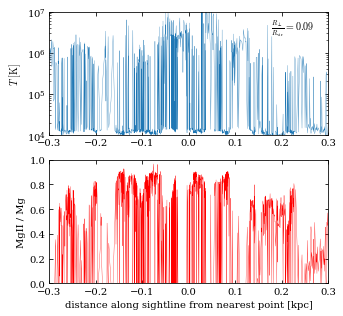

In [23]:
fig = pl.figure(figsize=(5,5))
ax = pl.subplot(211)
pl.plot(ls/rvir, Ts,lw=0.3)
ax.set_yscale('log')
pl.text(0.95,0.95,r'$\frac{R_\perp}{R_{\rm vir}}=%.2f$'%(Rimp/rvir),transform=ax.transAxes,ha='right',va='top')
pl.xlim(-0.3,0.3)
pl.ylim(1e4,1e7)
pl.ylabel(r'$T\ [{\rm K}]$')
ax = pl.subplot(212)
pl.plot(ls/rvir, fMgIIs,lw=0.3,c='r')
pl.ylim(0,1)
pl.xlim(-0.3,0.3)
pl.xlabel(r'distance along sightline from nearest point [kpc]')
pl.ylabel(r'MgII / Mg')
pl.savefig('../figures/MgII_in_supersonic_CGM.pdf')

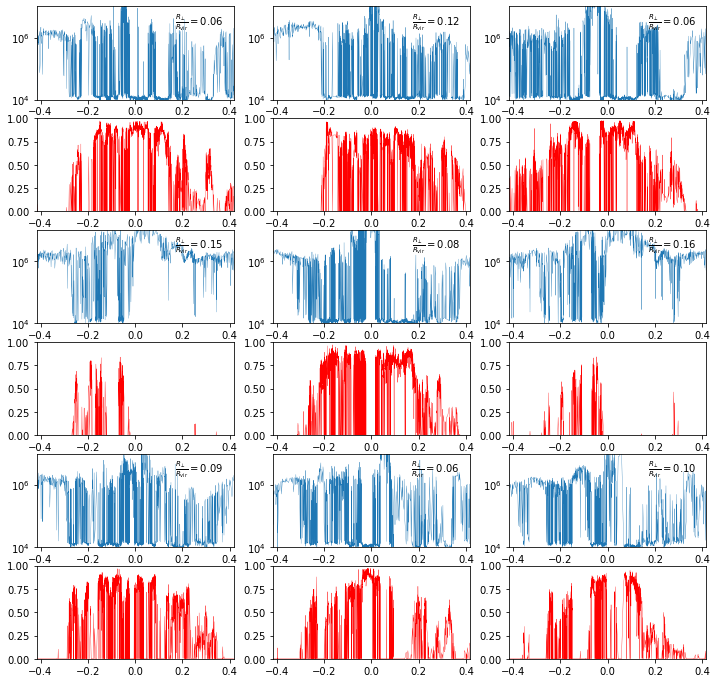

In [206]:
fig = pl.figure(figsize=(12,12))
for i,iSightline in enumerate(iSightlines[:-1]):
    f = h5py.File('ray_DLA_%d_snum77.h5'%iSightline)
    Ts = f['grid']['temperature'][:]
    nHs = f['grid']['H_p0_number_density'][:]+f['grid']['H_p1_number_density'][:]
    fMgIIs = ionFractions(nHs,Ts)
    coords = np.array([f['grid']['x'],f['grid']['y'],f['grid']['z']]).T / kpc2cm    
    rs = ((coords-center)**2).sum(axis=1)**0.5
    imin, Rimp = rs.argmin(), rs.min()
    ls = (f['grid']['l'][:] - f['grid']['l'][imin])/ kpc2cm 
    ax = pl.subplot(6,3,(i//3)*6+i%3+1)
    pl.plot(ls/rvir, Ts,lw=0.3)
    f.close()
    ax.set_yscale('log')
    pl.text(0.95,0.95,r'$\frac{R_\perp}{R_{\rm vir}}=%.2f$'%(Rimp/rvir),transform=ax.transAxes,ha='right',va='top')
    pl.xlim(-25/rvir,25/rvir)
    pl.ylim(1e4,1e7)
    ax = pl.subplot(6,3,(i//3)*6+i%3+4)
    pl.plot(ls/rvir, fMgIIs,lw=0.3,c='r')
    pl.ylim(0,1)
    pl.xlim(-25/rvir,25/rvir)


In [106]:
f['grid'].keys()

<KeysViewHDF5 ['C_metallicity', 'Fe_metallicity', 'H_nuclei_density', 'H_p0_number_density', 'H_p1_number_density', 'Mg_metallicity', 'N_metallicity', 'O_metallicity', 'Si_metallicity', 'density', 'dl', 'l', 'redshift', 'redshift_dopp', 'redshift_eff', 'relative_velocity_x', 'relative_velocity_y', 'relative_velocity_z', 'temperature', 'velocity_los', 'x', 'y', 'z']>

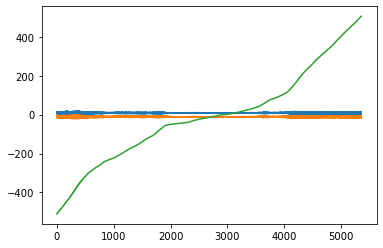

In [101]:
pl.plot(coords-center)

(0.0, 100.0)

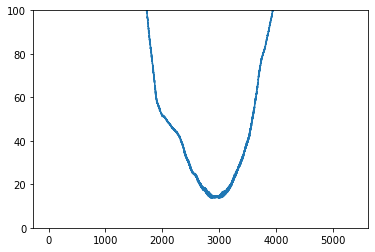

In [103]:
pl.plot(rs)
pl.ylim(0,100)

In [116]:
rs.argmin()


In [121]:
import matplotlib, matplotlib.scale

In [122]:
matplotlib.scale.SymmetricalLogScale?

(-30.0, 30.0)

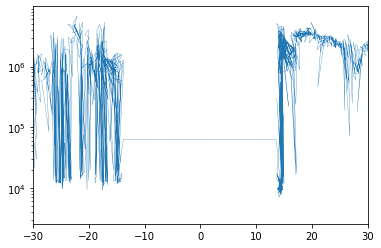

In [17]:
f['grid'].keys()

<KeysViewHDF5 ['C_metallicity', 'Fe_metallicity', 'H_nuclei_density', 'H_p0_number_density', 'H_p1_number_density', 'Mg_metallicity', 'N_metallicity', 'O_metallicity', 'Si_metallicity', 'density', 'dl', 'l', 'redshift', 'redshift_dopp', 'redshift_eff', 'relative_velocity_x', 'relative_velocity_y', 'relative_velocity_z', 'temperature', 'velocity_los', 'x', 'y', 'z']>

In [18]:
coords

array([[4.00904239e+25, 4.05683529e+25, 3.94087621e+25],
       [4.00909276e+25, 4.05824416e+25, 3.94100798e+25],
       [4.00773685e+25, 4.05819231e+25, 3.94112302e+25],
       ...,
       [4.01065866e+25, 4.05505233e+25, 4.25443482e+25],
       [4.00628560e+25, 4.05488004e+25, 4.25450436e+25],
       [4.00961629e+25, 4.05412776e+25, 4.25451801e+25]])

In [20]:
f['grid']['l'][:]

array([-2.84070623e+22, -2.70893151e+22, -2.59388870e+22, ...,
        3.10717905e+24,  3.10787451e+24,  3.10801098e+24])

In [37]:
from astropy import units as un, constants as cons

<<class 'astropy.constants.codata2018.EMCODATA2018'> name='Electron charge' value=1.602176634e-19 uncertainty=0.0 unit='C' reference='CODATA 2018'>

In [54]:
print((cons.G * cons.M_earth * cons.m_p/ cons.R_earth**2).to('N'))
print((cons.e.to('C')* v * B).to('N'))

1.638901553541873e-26 N
1.34582837256e-16 N


In [55]:
(cons.m_p*v/cons.e.to('C')/B).to('km')

<Quantity 9.74370592 km>

In [50]:
cons.mu0

<<class 'astropy.constants.codata2018.CODATA2018'> name='Vacuum magnetic permeability' value=1.25663706212e-06 uncertainty=1.9e-16 unit='N / A2' reference='CODATA 2018'>

In [41]:
v = 2.8e7*un.m/un.s
B = 30e-6*un.T

In [1]:
yt.OffAxisProjectionPlot

NameError: name 'yt' is not defined